In [4]:
# Created: 20250103

In [1]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [2]:
print(pyu.ps2("requests"))

requests==2.32.3



[*********************100%***********************]  1 of 1 completed


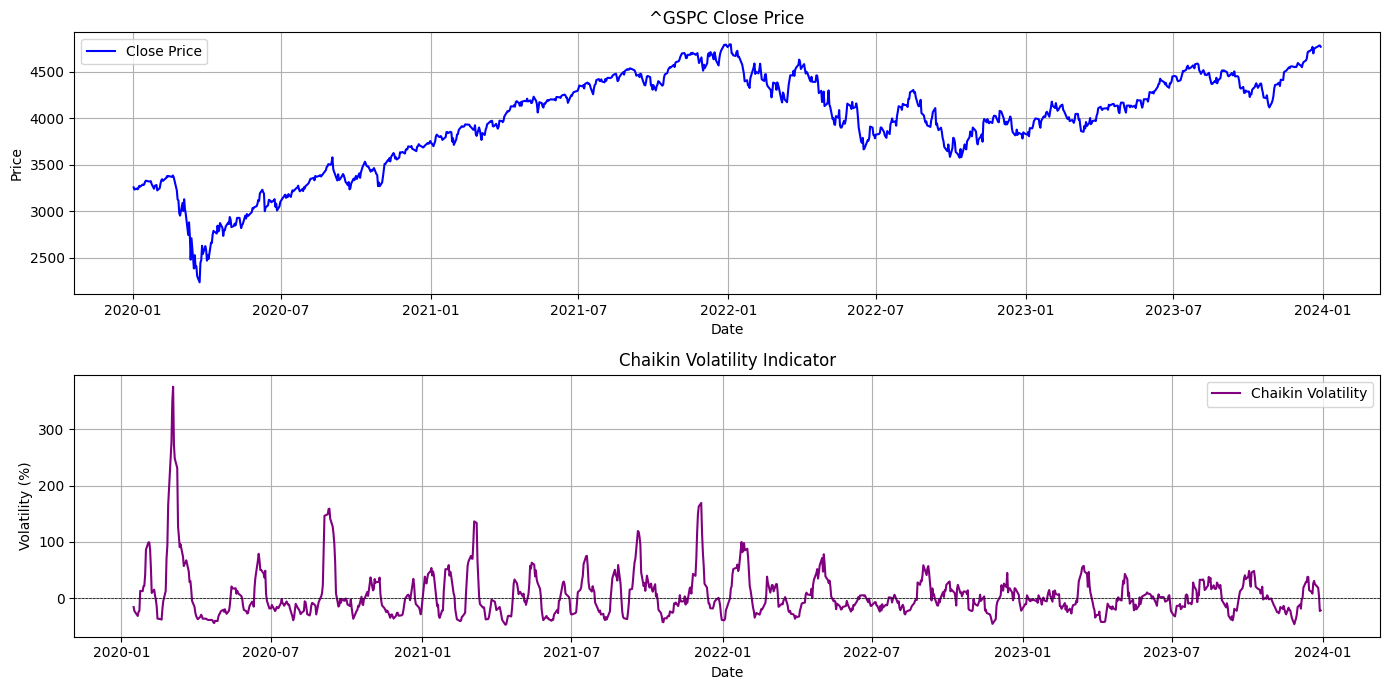

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download historical data
symbol = "^GSPC"  # S&P 500 as an example
start = "2020-01-01"
end = "2023-12-31"
data = yf.download(symbol, start=start, end=end)

# Step 2: Calculate Chaikin Volatility Indicator
def chaikin_volatility(data, ema_window=10, diff_period=10):
    # Calculate high-low range
    data['High-Low Range'] = data['High'] - data['Low']
    
    # Calculate EMA of the high-low range
    data['EMA'] = data['High-Low Range'].ewm(span=ema_window, adjust=False).mean()
    
    # Calculate Chaikin Volatility as percentage difference over diff_period
    data['Chaikin Volatility'] = ((data['EMA'] - data['EMA'].shift(diff_period)) / data['EMA'].shift(diff_period)) * 100
    
    return data

# Apply the function
data = chaikin_volatility(data)

# Step 3: Plot the Chaikin Volatility Indicator
plt.figure(figsize=(14, 7))

# Plot the close price
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title(f'{symbol} Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Plot the Chaikin Volatility
plt.subplot(2, 1, 2)
plt.plot(data['Chaikin Volatility'], label='Chaikin Volatility', color='purple')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.title('Chaikin Volatility Indicator')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [5]:
def show_chaikin_volatality_indicator(symbol):

    # Step 1: Download historical data
    start = "2020-01-01"
    end = "2023-12-31"
    data = yf.download(symbol, start=start, end=end)

    # Apply the function
    data = chaikin_volatility(data)
    
    # Step 3: Plot the Chaikin Volatility Indicator
    plt.figure(figsize=(14, 7))
    
    # Plot the close price
    plt.subplot(2, 1, 1)
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.title(f'{symbol} Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    
    # Plot the Chaikin Volatility
    plt.subplot(2, 1, 2)
    plt.plot(data['Chaikin Volatility'], label='Chaikin Volatility', color='purple')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.title('Chaikin Volatility Indicator')
    plt.xlabel('Date')
    plt.ylabel('Volatility (%)')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

[*********************100%***********************]  1 of 1 completed


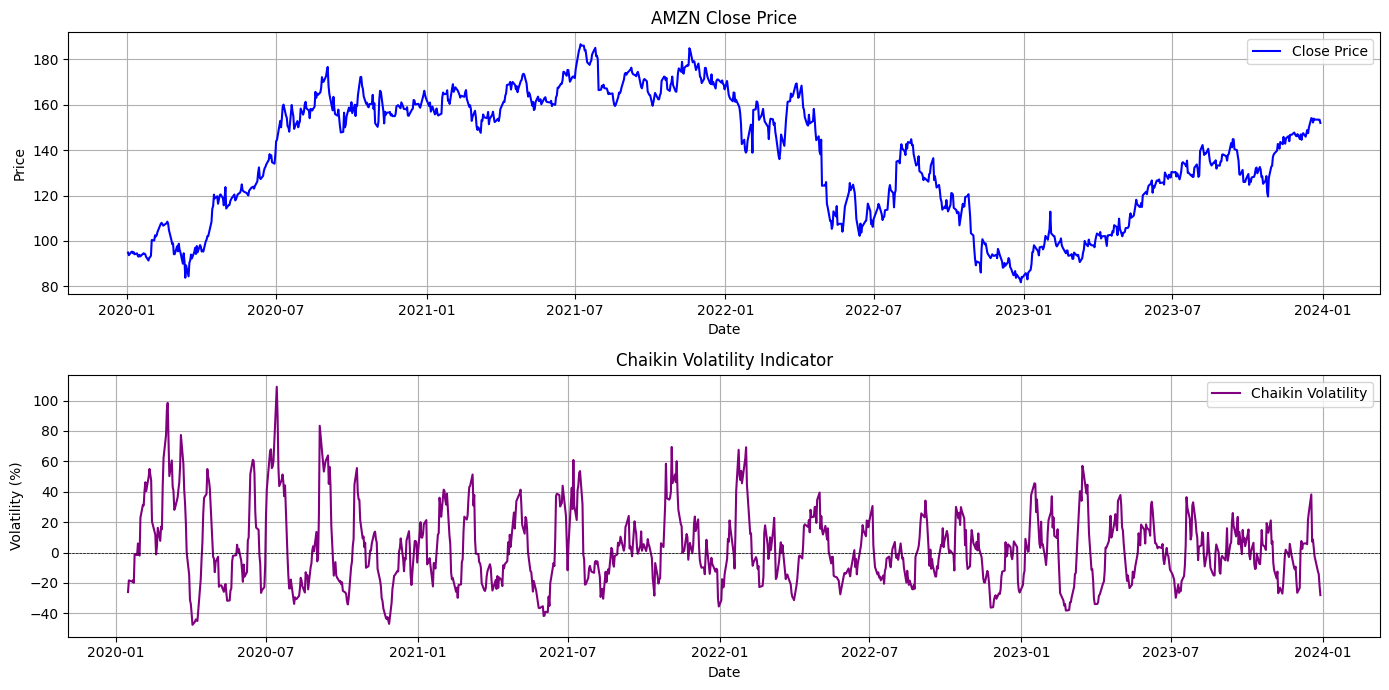

In [6]:
show_chaikin_volatality_indicator("AMZN")